In [58]:
import numpy as np
import pandas as pd

In [59]:
# load data

dataX=pd.read_csv("trainX.csv")
dataA=pd.read_csv("trainA.csv")
dataY=pd.read_csv("trainY.csv")

# remove index

dataX=dataX.values[:,1:]
dataY=dataY.values[:,1:-1]
dataA=dataA.values[:,1:]

In [60]:
# split cure or not cure
치료한환자데이터=pd.read_csv("2번 열을 제거한 치료한 환자 데이터.csv")
치료하지않은환자데이터=pd.read_csv("8번 열을 제거한 치료하지 않은 환자 데이터.csv")

In [61]:
치료한환자데이터

,X0,X1,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,time
0,0.82,0.00,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,2.07
1,0.78,0.32,0.51,0.82,0.70,0.60,0.39,0.01,0.60,0.28,0.02,0.53,0.22,0.89,0.86,0.32,16.53
2,0.52,0.03,0.85,0.18,0.57,0.07,0.58,0.30,0.85,0.93,0.13,0.99,0.48,0.39,0.37,0.95,4.81
3,0.36,0.68,0.39,0.77,0.23,0.79,0.77,0.11,0.50,0.34,0.51,0.47,0.15,0.20,0.55,0.29,0.27
4,0.09,0.18,0.21,0.64,0.20,0.55,0.08,0.25,0.78,0.33,0.06,0.47,0.11,0.24,0.99,1.00,5.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.02,0.53,0.49,0.06,0.70,0.47,0.41,0.14,0.68,0.43,0.06,0.02,0.13,0.51,0.30,0.94,0.08
260,0.85,0.03,0.12,0.66,0.79,0.21,0.83,0.85,0.99,0.31,0.43,0.24,0.85,0.05,0.04,0.32,0.52
261,0.41,0.07,0.50,0.98,0.95,0.23,0.05,0.58,0.87,0.11,0.18,0.53,0.90,0.09,0.16,0.33,18.49
262,0.50,0.99,0.88,0.68,0.34,0.96,1.00,0.19,0.80,0.14,0.29,0.41,0.40,0.73,0.76,0.01,4.77


In [62]:
치료하지않은환자데이터

,X0,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11,X12,X13,X14,X15,X16,time
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0.47
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,1.39
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,3.61
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,1.02
4,0.75,0.71,0.66,0.43,0.55,0.42,0.54,0.80,0.61,0.87,0.64,0.36,0.71,0.75,0.67,0.17,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.29,0.91,0.60,0.17,0.89,0.73,0.24,0.97,0.12,0.67,0.14,0.05,0.06,0.40,0.95,0.13,13.51
394,0.01,0.26,0.10,0.15,0.82,0.79,0.03,0.27,0.09,0.63,0.32,0.41,0.27,0.74,0.10,0.45,4.85
395,0.84,0.30,0.99,0.55,0.83,0.98,0.17,0.33,0.45,0.68,0.51,0.57,0.46,0.71,0.29,0.37,3.60
396,0.94,0.83,0.37,0.69,0.92,0.62,0.39,0.41,0.74,0.60,0.46,0.21,0.06,0.23,0.93,0.26,6.52


In [63]:
data_CY=치료한환자데이터['time']
dataNCY=치료하지않은환자데이터['time']
data_CX = 치료한환자데이터.loc[:,['X0','X1','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16']]
dataNCX = 치료하지않은환자데이터.loc[:,['X0','X1','X2','X3','X4','X5','X6','X7','X9','X10','X11','X12','X13','X14','X15','X16']]

In [64]:
data_CX

,X0,X1,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.82,0.00,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09
1,0.78,0.32,0.51,0.82,0.70,0.60,0.39,0.01,0.60,0.28,0.02,0.53,0.22,0.89,0.86,0.32
2,0.52,0.03,0.85,0.18,0.57,0.07,0.58,0.30,0.85,0.93,0.13,0.99,0.48,0.39,0.37,0.95
3,0.36,0.68,0.39,0.77,0.23,0.79,0.77,0.11,0.50,0.34,0.51,0.47,0.15,0.20,0.55,0.29
4,0.09,0.18,0.21,0.64,0.20,0.55,0.08,0.25,0.78,0.33,0.06,0.47,0.11,0.24,0.99,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.02,0.53,0.49,0.06,0.70,0.47,0.41,0.14,0.68,0.43,0.06,0.02,0.13,0.51,0.30,0.94
260,0.85,0.03,0.12,0.66,0.79,0.21,0.83,0.85,0.99,0.31,0.43,0.24,0.85,0.05,0.04,0.32
261,0.41,0.07,0.50,0.98,0.95,0.23,0.05,0.58,0.87,0.11,0.18,0.53,0.90,0.09,0.16,0.33
262,0.50,0.99,0.88,0.68,0.34,0.96,1.00,0.19,0.80,0.14,0.29,0.41,0.40,0.73,0.76,0.01


In [65]:
dataNCX

,X0,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11,X12,X13,X14,X15,X16
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96
4,0.75,0.71,0.66,0.43,0.55,0.42,0.54,0.80,0.61,0.87,0.64,0.36,0.71,0.75,0.67,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.29,0.91,0.60,0.17,0.89,0.73,0.24,0.97,0.12,0.67,0.14,0.05,0.06,0.40,0.95,0.13
394,0.01,0.26,0.10,0.15,0.82,0.79,0.03,0.27,0.09,0.63,0.32,0.41,0.27,0.74,0.10,0.45
395,0.84,0.30,0.99,0.55,0.83,0.98,0.17,0.33,0.45,0.68,0.51,0.57,0.46,0.71,0.29,0.37
396,0.94,0.83,0.37,0.69,0.92,0.62,0.39,0.41,0.74,0.60,0.46,0.21,0.06,0.23,0.93,0.26


In [66]:
from keras import models
from keras import layers
import tensorflow as tf

In [72]:
def build_dnn_swish_adam():
  # 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
  X = tf.keras.layers.Input(shape=[16])
  
  H = tf.keras.layers.Dense(2048)(X)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 1
  
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 2
  
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 3

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 4

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 5

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 6

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 7
    
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 8

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 9

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 10

  H = tf.keras.layers.Dense(2048)(X)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 11
  
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 12
  
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 13

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 14

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 15

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 16

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 17
    
  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 18

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 19

  H = tf.keras.layers.Dense(2048)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H) # Hidden layer 20
  
  Y = tf.keras.layers.Dense(1)(H)
  model = tf.keras.models.Model(X, Y)
  model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
  return model

def build_model_NC_100_stepper():
  # 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
  X = tf.keras.layers.Input(shape=[16])
  
  H = tf.keras.layers.Dense(2048)(X)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(1024)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(512)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)

  H = tf.keras.layers.Dense(256)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)

  H = tf.keras.layers.Dense(128)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  Y = tf.keras.layers.Dense(1)(H)
  model = tf.keras.models.Model(X, Y)
  model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
  return model

In [ ]:
# 치료 데이터
num_epochs = 10000
all_mae_histories_cured = []
k = 4
num_val_samples = len(data_CX) // k
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = data_CX[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = data_CY[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [data_CX[:i * num_val_samples],
         data_CX[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [data_CY[:i * num_val_samples],
         data_CY[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_dnn_swish_adam()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history_cured = history.history['val_mean_absolute_error']
    all_mae_histories_cured.append(mae_history_cured)

처리중인 폴드 # 0


In [ ]:
# 치료하지 않은 데이터
num_epochs = 10000
all_mae_histories_non_cured = []
k = 4
num_val_samples = len(dataNCX) // k
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = dataNCX[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dataNCY[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [dataNCX[:i * num_val_samples],
         dataNCX[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [dataNCY[:i * num_val_samples],
         dataNCY[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_dnn_swish_adam()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history_non_cured = history.history['val_mean_absolute_error']
    all_mae_histories_non_cured.append(mae_history_non_cured)

In [97]:
# 치료 의사 결정 모델과 비치료 의사 결정 모델의 평균 MAE 값의 히스토리를 구한다.
average_mae_history_cured = [
    np.mean([x[i] for x in all_mae_histories_cured]) for i in range(num_epochs)]
average_mae_history_non_cured = [
    np.mean([x[i] for x in all_mae_histories_non_cured]) for i in range(num_epochs)]

In [98]:
import matplotlib.pyplot as plt

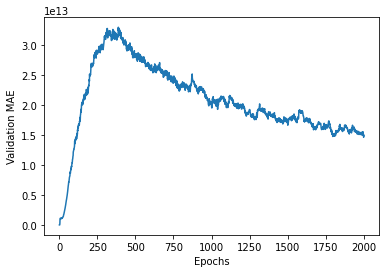

In [99]:
# 치료 의사 결정 모델 예상 생존 시간을 그래프로 출력한다.
plt.plot(range(1, len(average_mae_history_cured) + 1), average_mae_history_cured)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

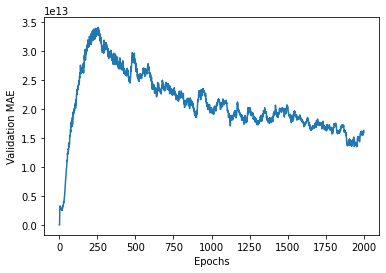

In [100]:
# 치료하지 않는 의사 결정 모델 예상 생존 시간을 그래프로 출력한다.
plt.plot(range(1, len(average_mae_history_non_cured) + 1), average_mae_history_non_cured)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


In [ ]:
smooth_mae_history_cured = smooth_curve(average_mae_history_cured[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history_cured)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
smooth_mae_history_non_cured = smooth_curve(average_mae_history_cured[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history_non_cured)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# 3.데이터로 모델을 학습(FIT)합니다.
model = build_dnn_swish_adam() # 최저 loss 값 : 0.0492
model.fit(data_CX, data_CY, epochs=30000, batch_size=16, verbose=0)
model.fit(data_CX, data_CY, epochs=1, batch_size=16, verbose=1)

In [ ]:
# 3.치료하지 않았고 생존시간이 100 이하인 환자 데이터로 모델을 학습(FIT)합니다.
model_NC = build_dnn_swish_adam() # 최저 loss 값 : 0.0159
model_NC.fit(dataNCX, dataNCY, epochs=30000, batch_size=16,verbose=0)
model.fit(dataNCX, dataNCY, epochs=1, batch_size=16, verbose=1)

In [ ]:
치료_환자_파일경로 = '2번 열을 제거한 치료한 환자 테스트 데이터.csv'
비치료_환자_파일경로 = '8번 열을 제거한 치료하지 않은 환자 테스트 데이터.csv'
치료_환자_데이터 = pd.read_csv(치료_환자_파일경로)
비치료_환자_데이터 = pd.read_csv(비치료_환자_파일경로)

In [ ]:
# 치료할 경우 생존 시간을 구한다.
cured = model.predict(치료_환자_데이터)
# 치료하지 않을 경우 생존 시간을 구한다.
non_cured = model_NC.predict(비치료_환자_데이터)

# 치료한 경우 생존 시간 > 치료하지 않은 경우 생존 시간 : 1, 
# 치료한 경우 생존 시간 > 치료하지 않은 경우 생존 시간 : 0
result = np.where(cured > non_cured, 1, 0)
print(result)

In [ ]:
import csv 

# 이차원 리스트 
with open('result_20200902_2.csv','w', newline='') as f: 
  makewrite = csv.writer(f) 
  
  for value in result: 
    makewrite.writerow(value)


In [ ]:
"""
from openpyxl import Workbook
 
write_wb = Workbook()
 
#이름이 있는 시트를 생성
#write_ws = write_wb.create_sheet('생성시트')
 
#Sheet1에다 입력
write_ws = write_wb.active
write_ws['A1'] = 'Title'
write_ws['B1'] = 'action'
 
#행 단위로 추가
# write_ws.append([1,2,3])
 
#셀 단위로 추가
i = 1
for value in result:
  write_ws.cell(i,2, value)
  i= i+1
write_wb.save('/content/drive/My Drive/traindata/result_20200824_3.csv')
"""